### Load necessary modules and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import TransCompR as tcr

In [2]:
human_metadata = pd.read_csv('GSE33341_human_metadata.csv', index_col='Sample_geo_accession')
human_expression = pd.read_csv('human_expression_geneID.csv', index_col='ID_REF')
mouse_metadata = pd.read_csv('GSE33341_mouse_metadata.csv', index_col='Sample_geo_accession')
mouse_expression = pd.read_csv('mouse_expression_geneID.csv', index_col='ID_REF')
human_classes = human_metadata['pathogen']!='-'

Note that the columns of the ogranism 1 and 2's data has been matched already in this example. Now let's give it a preview:

In [3]:
human_expression.head(10)

,DDR1,RFC2,PAX8,GUCA1A,UBA7,THRA,PTPN21,CCL5,CYP2E1,EPHB3,...,ALS2CL,SMIM14,EMC10,LAMA1,FBXO31,SLC44A1,KCNE4,TMEM231,SNHG17,NPEPL1
ID_REF,,,,,,,,,,,,,,,,,,,,,
GSM824707,7.00889,7.24200,8.33034,4.03420,8.39803,5.96307,4.69108,10.61470,3.93123,5.72421,...,7.36255,4.30174,5.11359,4.66935,6.14547,4.76208,4.02242,4.10080,6.61629,7.58422
GSM824708,7.09632,6.87557,7.99800,3.83309,9.40449,5.72081,4.26818,10.52270,3.88945,5.75642,...,6.79736,5.02472,5.16065,4.58411,6.15040,4.83636,4.17451,4.21577,7.18347,7.41464
GSM824709,6.94109,6.86724,7.89547,3.53612,9.24506,5.49332,4.31802,11.26410,3.93450,5.30894,...,6.62297,4.70408,4.89644,4.77543,6.25433,4.96199,3.99491,4.09268,8.06889,7.31179
GSM824710,6.90002,7.11689,7.85057,3.76981,9.26308,5.57711,4.35805,11.50350,4.01784,5.44269,...,6.73836,5.09136,5.07144,4.73067,5.89206,5.22872,3.94885,4.23540,7.67487,7.26331
GSM824711,7.45450,7.65023,8.27229,3.86178,9.80692,5.90567,4.60175,11.27680,3.77905,6.07312,...,7.33798,4.31237,6.08119,4.50602,6.42534,5.58384,4.04788,4.11791,8.00925,7.75276
GSM824712,6.69461,7.29010,8.09235,3.51172,8.23593,5.68906,4.45657,9.83553,4.13670,5.56029,...,6.76512,4.25240,4.99386,4.71473,6.05080,4.69516,4.19092,4.34889,7.62965,7.37518
GSM824713,6.87552,6.89077,7.82074,3.48766,9.51382,5.31584,4.12190,11.36380,4.01738,5.57850,...,7.18054,4.00362,5.67785,4.58578,6.35228,4.55718,4.04887,4.10583,7.08354,7.36076
GSM824714,6.87659,7.26177,7.92639,3.65178,8.94733,5.29128,4.40682,9.82324,3.94275,5.65832,...,6.93221,4.01623,5.11251,5.02290,5.89656,4.52838,4.12902,4.10702,7.95580,7.48174
GSM824715,7.16348,7.30111,8.45341,3.75418,8.43574,5.52944,4.56456,11.32970,3.92538,5.70801,...,7.26387,4.27305,5.18532,4.82684,6.26611,4.92633,4.07648,4.38087,7.76745,7.73944


In [4]:
mouse_expression.head(10)

,Ddr1,Rfc2,Pax8,Guca1a,Uba7,Thra,Ptpn21,Ccl5,Cyp2e1,Ephb3,...,Als2cl,Smim14,Emc10,Lama1,Fbxo31,Slc44a1,Kcne4,Tmem231,Snhg17,Npepl1
ID_REF,,,,,,,,,,,,,,,,,,,,,
GSM824455,6.59075,7.16547,4.64884,5.24159,9.67901,6.45267,6.51602,10.27910,13.30180,6.14806,...,6.42583,9.97392,8.76198,3.72310,6.85752,9.04414,5.96308,5.69251,5.83802,8.29632
GSM824456,6.28290,7.64314,4.11605,5.18289,10.03550,6.73455,6.13205,10.16850,5.05888,6.17968,...,6.51857,10.25670,9.04596,3.48279,6.93879,9.53237,5.90119,5.58291,6.15930,8.17503
GSM824457,6.61388,7.56823,3.94917,4.81408,9.96304,6.65090,6.10990,10.96150,10.99300,5.97237,...,6.53526,10.17460,9.22475,3.71384,6.99318,9.20157,5.81836,5.65909,6.22437,8.35139
GSM824458,6.31724,7.08073,3.98135,5.14003,8.55048,6.36744,6.72110,10.15500,13.66380,5.79291,...,5.79879,9.44714,8.83273,3.71983,8.56007,8.61856,5.72251,5.52079,5.74857,8.33560
GSM824459,6.37421,7.31968,4.42089,4.95410,9.26919,6.55388,6.37879,10.25590,13.04120,5.91085,...,6.05432,9.86302,8.57774,3.65745,8.51932,9.39061,6.00684,5.80044,5.84194,7.91521
GSM824460,6.37428,7.49725,4.17620,5.38814,9.22984,6.65039,6.29226,10.51860,12.98680,5.92439,...,6.01197,9.83926,8.83082,3.61815,8.16563,8.73853,5.99903,5.98325,5.95270,8.56109
GSM824461,6.56696,7.24045,4.63141,5.23219,10.03310,6.29659,6.36184,10.82330,11.35410,6.17993,...,5.84615,10.24530,8.50277,3.66471,6.54469,10.07810,6.05632,5.95467,5.96663,8.35363
GSM824462,6.57117,7.30288,4.27666,5.29497,9.77620,6.21170,6.16470,9.97579,10.80650,6.52038,...,5.87113,10.39910,8.50116,3.87288,6.58916,9.91247,6.23784,6.30368,6.06283,8.13063
GSM824463,6.41298,7.46406,4.45465,5.25425,9.87129,6.30651,6.06194,10.85680,6.82483,6.49700,...,5.93887,10.25460,8.26271,3.75790,6.15841,9.86177,6.33235,6.24784,6.09837,8.24744


The TransCompR essentially takes 3 inputs: The profile of organism 1, the profile of organism 2, and the binary classes of organism 2 that has the biological significance we are interested in. What TransCompR does is to use **organism 1's pattern** to interpret **organism 2's classes**.

In this tutorial, since we are interested in how the mouse feature pattern is indicative of human infection status, let's be clear about the variable assignment here: **organism 1 is mouse and organism 2 is human**.

### Applying the TransCompR Method

The main function in this package is `TransCompR`, which performs the cross-species transcriptomic comparison. In the simplest scenario, it works like:
`results = tcr.TransCompR(organism1_data, organism2_data, organism2_classes)`, which will run PCA on your organism 1's data, keep the top 50 PC by default, project organism 2's data into the feature space derived from organism 1, and perform a logistic regression with l1 penalty and C = 1.0 on the organism 2 classes over the projected organism 2's data.

Given that our organism 1 is mouse and organism 2 is human, the code to run TransCompR should be:

In [19]:
results = tcr.TransCompR(mouse_expression, human_expression, human_classes,random_state = 42)

The `results` is a dictionary containing all the relevant statistics.

In [6]:
results.keys()

dict_keys(['organism1_features', 'organism2_features', 'organism1_hvf', 'model', 'organism1_loadings', 'organism1_scores', 'organism2_transComps', 'organism2_classes', 'X', 'X_noZ', 'y', 'training', 'testing', 'regression_terms', 'all_regression_coeffs', 'cross_validation_metrics', 'predictivity_summary'])

See the documentation for detailed API, but some commonly used keys will be:
>- `results['organism1_loadings']`: pandas DataFrame of n_pcs x n_features. Loadings of organism1 features on organism1 PCs.
>- `results['organism1_scores']`: Array of float64 of n_organism1 x n_pcs. score of organism1s on organism1 PCs.
>- `results['organism2_transComps']`: pandas DataFrame of n_organism2s x n_pcs. Projected scores of organism2 on organism1 PCs.

Importantly, the `results['predictivity_summary']` is a pandas DataFrame that has n_organism2 rows. Each column of it describes a different aspect of the predictivity of each organism1 PC on organism2_classes.

In [7]:
results['predictivity_summary'].head(10)

,PCs,coefs,sorted_organism1_features,sorted_organism1_features_loadings,organism1_explained,organism2_explained,davies_bouldin_score,calinski_harabasz_score,difference_of_means,t_test_p_value
0,1,0.000000,"[Rragc, Smu1, Mapk1ip1l, Copa, Psmc1, Dcaf13, ...","[-0.019585720209541368, -0.019388246768567024,...",0.206462,0.039891,4.373699,2.272407,-6.466467,1.351215e-01
1,2,0.000000,"[Arhgap45, Ptk2b, Rasa3, Sipa1, Mical1, Arhgap...","[-0.02792973000776499, -0.02739438429617197, -...",0.092916,0.020900,0.934329,54.113414,-18.346642,7.682802e-11
2,3,-1.811914,"[Mefv, Fcer1g, Tpd52, Alox5ap, P2ry13, Mboat7,...","[-0.027194949970825114, -0.02709963913188523, ...",0.073382,0.009951,0.559519,174.483261,16.832392,5.778879e-23
3,4,0.000000,"[Eps15, Pef1, Rit1, Gipc1, Rtn4, Pdk3, Ppp1r2,...","[-0.029415736293685654, -0.02900973567634262, ...",0.069915,0.003729,0.834817,81.383463,8.724074,2.617647e-14
4,5,0.000000,"[Dynll1, Pld3, Pold3, Phgdh, Slc1a5, Parp2, Dp...","[-0.028120491916428694, -0.02808405548386835, ...",0.051653,0.007693,0.869496,65.282176,-11.783792,2.457552e-12
5,6,0.000000,"[Bst2, Alg12, Miip, Ifit1, Trafd1, Fdxr, Il12r...","[-0.03134838497344154, -0.029553014079433407, ...",0.034290,0.001863,13.712735,0.247399,0.466082,6.200994e-01
6,7,2.109438,"[Rpl28, Hs6st1, Pkig, Rps8, Rassf1, Tmem87a, M...","[-0.04274033292567822, -0.03956671999684159, -...",0.030260,0.001393,0.468710,260.973303,-6.691546,1.321111e-28
7,8,-0.507545,"[Ndufa2, Ndufb11, Timm17b, Cox17, Mrpl57, Pam1...","[-0.039588066724659525, -0.03871248344032517, ...",0.023942,0.005204,1.012815,47.696630,8.790224,6.300842e-10
8,9,0.000000,"[Dhx9, Gngt1, Ptafr, Paf1, Zg16, Rhoh, P2ry10,...","[-0.03439686198172189, -0.03320487084294613, -...",0.022473,0.002317,1.245250,33.555109,-5.189773,9.580563e-08
9,10,-0.122563,"[Man1c1, Cysltr1, Espl1, Plxnb2, Gm2a, Csf1r, ...","[-0.04452531904933336, -0.04160051007172139, -...",0.017697,0.002153,2.845299,5.778836,2.352518,1.822512e-02


Some fundamental ones are:

>- `['coefs']`: Coefficients of each PC in the logistic regression.
>- `['sorted_organism1_features']` and >- `['sorted_organism1_features_loadings']`: Names and values of organism1 features sorted by their loadings on each PC in an ascending order
>- `['organism1_explained']` and >- `['organism2_explained']`: Percentage of total variance in organism2 data explained by organism1 PCs.
>- `['individual_predictivity']` or `['davies_bouldin_score']` or`['calinski_harabasz_score']` or `['difference_of_means']` or `['t_test_p_values']`: Different metrics that describe how well the 2 classes o organism 2 are spread out on each PC (i.e., has distinct TransComp scores). 'individual_predictivity' is the accuracy when only using one PC to predict binary classes, 'davies_bouldin_score' and 'calinski_harabasz_score' are two widely used metrics to describe the clustering, 'difference_of_means' as its name implies, and 't_test_p_values' is the p-value of the t-test performed on the 'difference_of_means.'

### Visualize the variance explained by organism1-derived patterns in both organism1 and organism2

Because the foundation of TransCompR is PCA, it is intuitive and informative to show the variance explained by organism1-derived PCs. You can always call `results['predictivity_summary']['organism1_explained']`, `results['predictivity_summary']['organism2_explained']` to get the exact value.

In TransCompR, there is a way to visualize both at the same time. Let's say we want to check the % of varianced explained by the first 20 PCs:

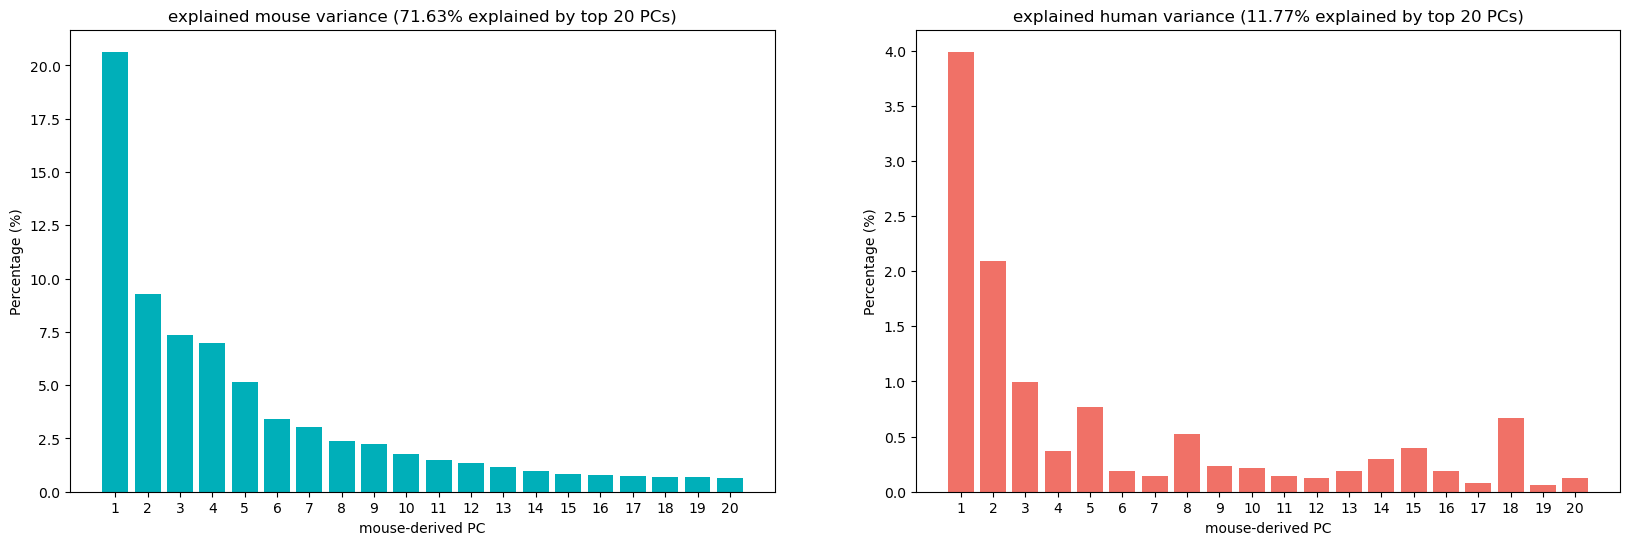

In [8]:
tcr.plot.var_explained(results, organism1_name='mouse', organism2_name='human', n_pcs=20)

Not much of human variance is captured by mouse PCs. Nevertheless, we also need to acknowledge that not all human variance is strongly reflective of the binary classification, which is the infection status in this case. Let's see if some PCs explains little mouse variace but relatively more human variance:

In [9]:
results['predictivity_summary'].sort_values(by = 'organism2_explained', ascending = False).head(10)

,PCs,coefs,sorted_organism1_features,sorted_organism1_features_loadings,organism1_explained,organism2_explained,davies_bouldin_score,calinski_harabasz_score,difference_of_means,t_test_p_value
0,1,0.000000,"[Rragc, Smu1, Mapk1ip1l, Copa, Psmc1, Dcaf13, ...","[-0.019585720209541368, -0.019388246768567024,...",0.206462,0.039891,4.373699,2.272407,-6.466467,1.351215e-01
1,2,0.000000,"[Arhgap45, Ptk2b, Rasa3, Sipa1, Mical1, Arhgap...","[-0.02792973000776499, -0.02739438429617197, -...",0.092916,0.020900,0.934329,54.113414,-18.346642,7.682802e-11
2,3,-1.811914,"[Mefv, Fcer1g, Tpd52, Alox5ap, P2ry13, Mboat7,...","[-0.027194949970825114, -0.02709963913188523, ...",0.073382,0.009951,0.559519,174.483261,16.832392,5.778879e-23
4,5,0.000000,"[Dynll1, Pld3, Pold3, Phgdh, Slc1a5, Parp2, Dp...","[-0.028120491916428694, -0.02808405548386835, ...",0.051653,0.007693,0.869496,65.282176,-11.783792,2.457552e-12
17,18,0.000000,"[Pola1, Mad2l1, Parpbp, Bub1, Brca1, Sh3bp5, S...","[-0.042871730507960275, -0.04162514816118808, ...",0.006846,0.006691,1.149286,29.825694,8.440402,3.994239e-07
7,8,-0.507545,"[Ndufa2, Ndufb11, Timm17b, Cox17, Mrpl57, Pam1...","[-0.039588066724659525, -0.03871248344032517, ...",0.023942,0.005204,1.012815,47.696630,8.790224,6.300842e-10
14,15,0.000000,"[Ucp1, Cidec, Myh2, Ibsp, Ptgds, Retn, Krt7, A...","[-0.04249811270772707, -0.040916731811687465, ...",0.008409,0.003929,6.058441,1.245415,1.510724,2.673364e-01
3,4,0.000000,"[Eps15, Pef1, Rit1, Gipc1, Rtn4, Pdk3, Ppp1r2,...","[-0.029415736293685654, -0.02900973567634262, ...",0.069915,0.003729,0.834817,81.383463,8.724074,2.617647e-14
20,21,0.000000,"[Gapdhs, Metap1, Alas2, Ammecr1, Polr1b, Znrd2...","[-0.041917593390812094, -0.03747951868411503, ...",0.005590,0.003656,1.691038,15.312428,-4.763015,1.744382e-04
13,14,0.000000,"[Srsf1, Tmem123, Rps24, Rbm3, Ikbkg, Srsf7, Pd...","[-0.03310170024067614, -0.03181333314752059, -...",0.009585,0.002943,1666.931508,0.000017,-0.004856,9.967233e-01


To save the graph, enter your save path to the argument. In this example, I passed '', which means I just save the graph under the directory where I open the jupyter lab. Note, this is path-only, and TransCompR decide the file name for you:

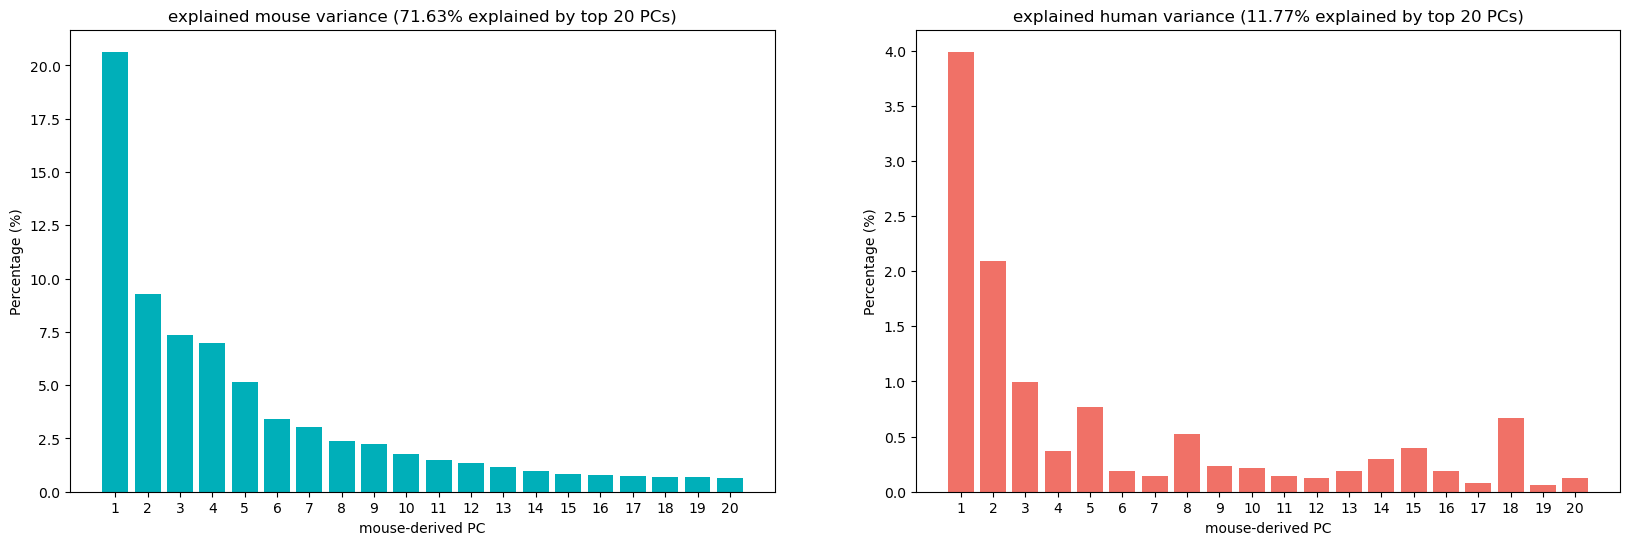

In [10]:
tcr.plot.var_explained(results, organism1_name='mouse', organism2_name='human', n_pcs=20, save_path = '')

Maybe you don't like the style of the graph generated by TransCompR. In this way, you can set the `return_figures` in the input to `True` and play with the matplotlib.figure object directly.

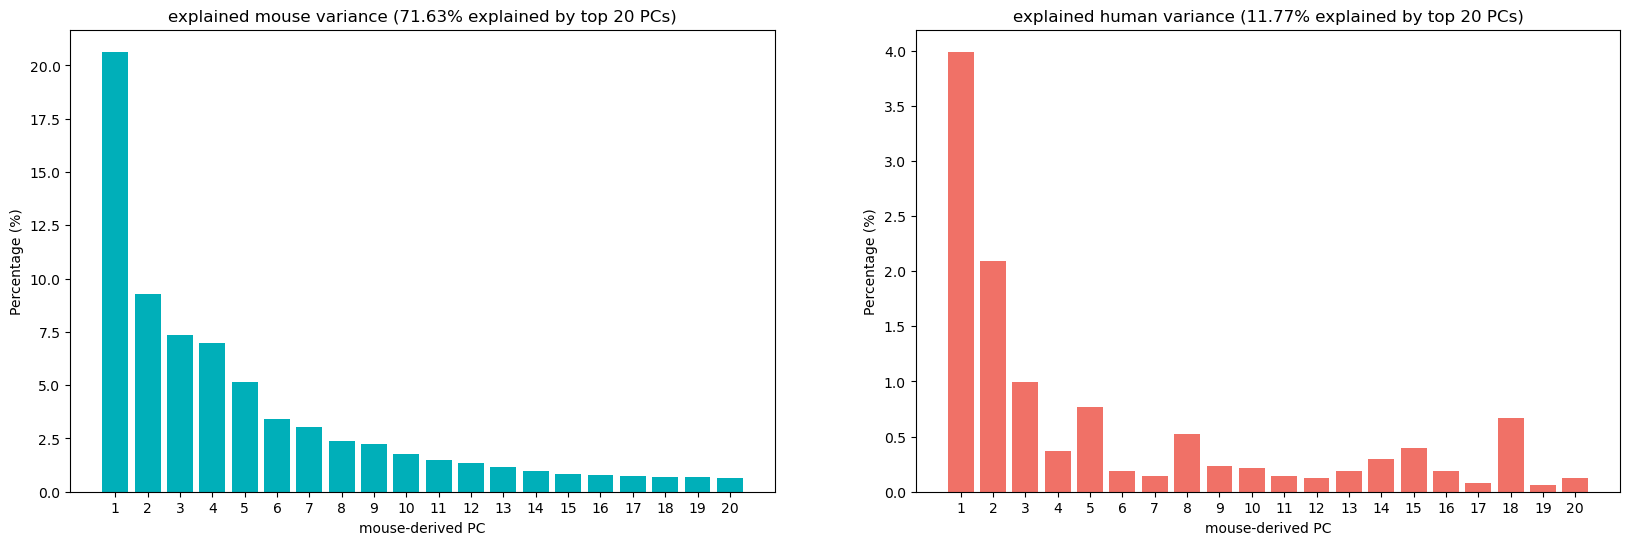

In [11]:
fig = tcr.plot.var_explained(results, organism1_name='mouse', organism2_name='human', n_pcs=20, return_figures = True)

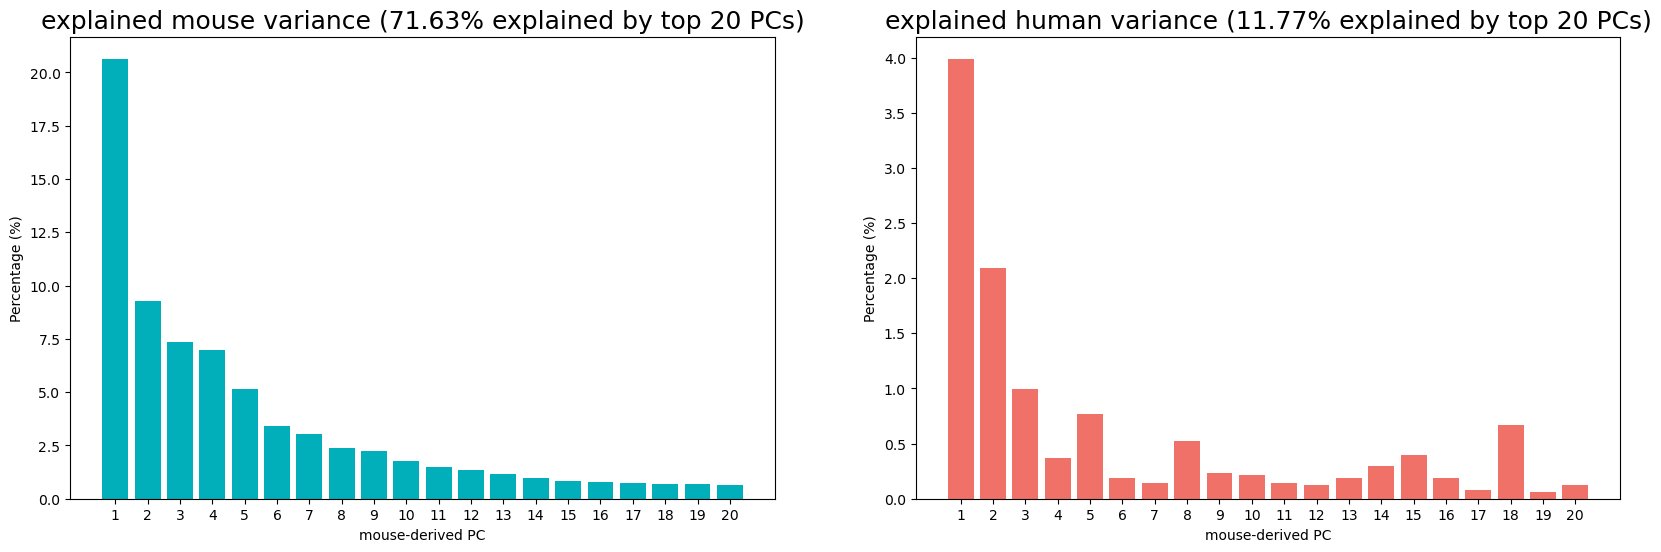

In [12]:
ax = fig.get_axes()
for i in ax:
    i.title.set_fontsize(fontsize = 18)
fig

### Find out which organism1 derived PC can best separate the organism2 classes

As previously mentioned, TransCompR comes with 6 metrics to evaluate the class separation on PCs (`'coef'`,`'individual_predictivity'`,`'davies_bouldin_score'`,`'calinski_harabasz_score'`,`'difference_of_means'`, or `'t_test_p_values'`). If you would like to use one of the metric we have, it is pretty straightforward: just sort the `results['predictivity_summary']` based on the column you like and read the `'PCs'` column. Let's say we want to use Davies Bouldin score, the smaller it is the better data is separated on that PC:

In [20]:
results['predictivity_summary'].sort_values(by = 'davies_bouldin_score', ascending = True).head(5)

,PCs,coefs,sorted_organism1_features,sorted_organism1_features_loadings,organism1_explained,organism2_explained,davies_bouldin_score,calinski_harabasz_score,difference_of_means,t_test_p_value
6,7,0.956762,"[Rpl28, Hs6st1, Pkig, Rps8, Rassf1, Tmem87a, M...","[-0.042740329909297714, -0.03956671049686078, ...",0.030260,0.001393,0.468710,260.972650,-6.691538,1.321224e-28
2,3,-2.401558,"[Mefv, Fcer1g, Tpd52, Alox5ap, P2ry13, Mboat7,...","[-0.027194949592580665, -0.02709963941394491, ...",0.073382,0.009951,0.559519,174.483261,16.832392,5.778878e-23
44,45,-0.269801,"[Ldb2, Clec1a, Rbms2, Extl1, Arl2, Eogt, Col9a...","[-0.04464963109691542, -0.041199714420107385, ...",0.002088,0.000174,0.719739,106.288905,2.014757,5.115302e-17
47,48,0.218006,"[Tmod2, Emx2, Btc, Dennd6b, Kcnj2, Mccc2, Snap...","[-0.051449828616611536, -0.04586113231554129, ...",0.001944,0.000249,0.725772,97.243841,-2.359664,4.471124e-16
42,43,0.000000,"[Thtpa, Jmjd4, Dnajb1, Tubb2b, Gcc1, Dipk2b, P...","[-0.0464981501060571, -0.04283379234203179, -0...",0.002250,0.000891,0.815157,72.772583,4.136407,2.806703e-13


Seems like PC 7, 3, 45, 48, and 43 are the top 5 mouse-derived PC that has the lowest Davies Boulding score. Now, if you'd like to visualize the kernel density of organism2 samples on these PCs, TransCompR has a function called `partition` under its `plot` module.

`tcr.plot.partition(results,organism_name='organism2', metric='db', top_n_pcs=5)`

The `'metric'` argument defines the metric to be used for selecting top principal components. Currently, TransCompR accepts 'db', 'coefs', 'indiv acc','ch','mean diff','tp', which are just abbreviation of the metrics mentioned above. The default is 'db'. `'top_n_pcs'` defines based on the selected metric, how many top PCs you want to plot.

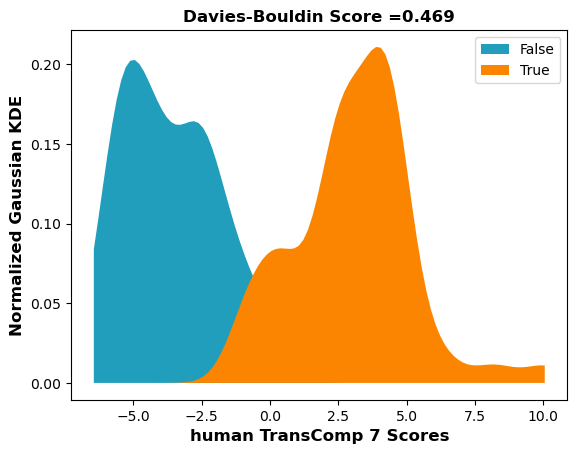

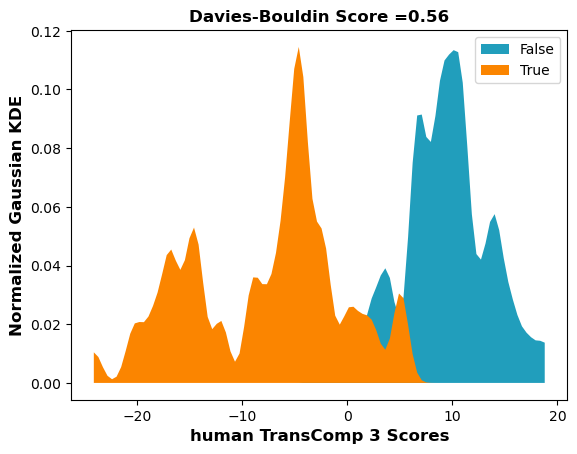

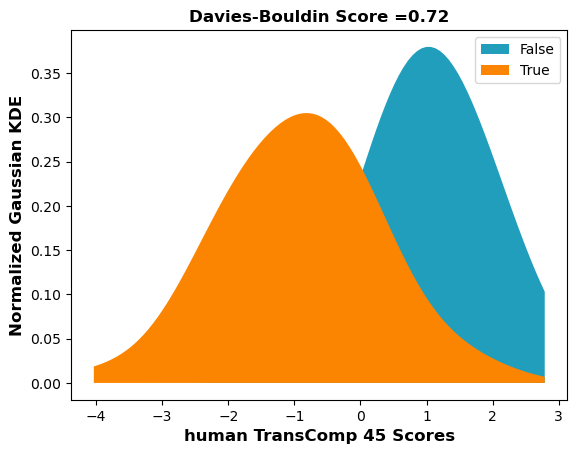

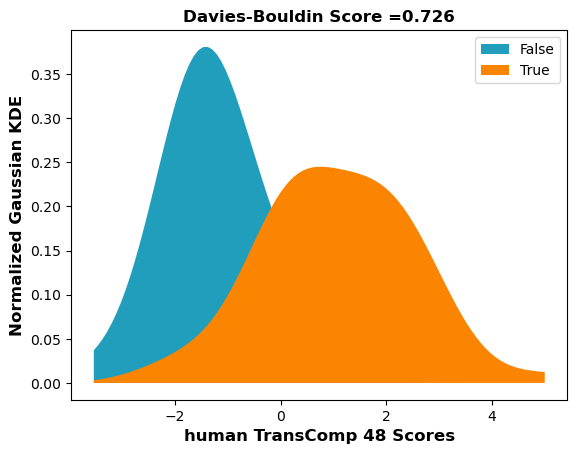

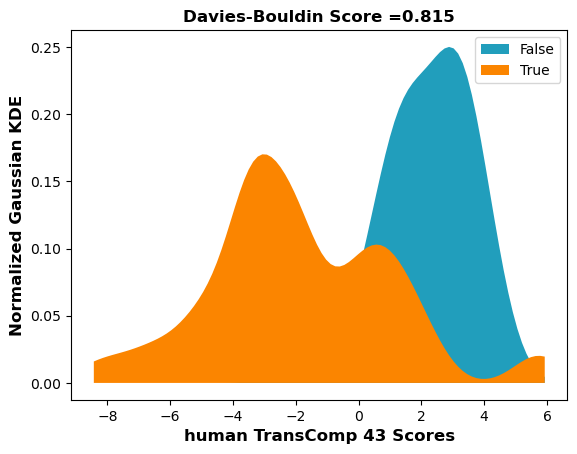

In [21]:
tcr.plot.partition(results,organism2_name='human', metric='db', top_n_pcs=5)

If you have a specific PC in mind (i.e., you are very curious how PC1 and PC2 work and what are their db score), simply call (and keep in mind python's indexing start from 0):

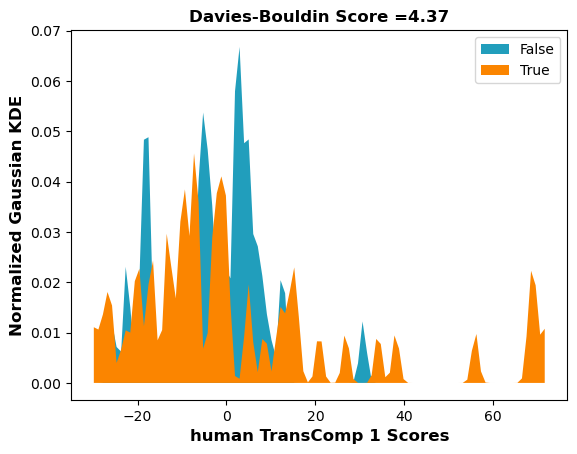

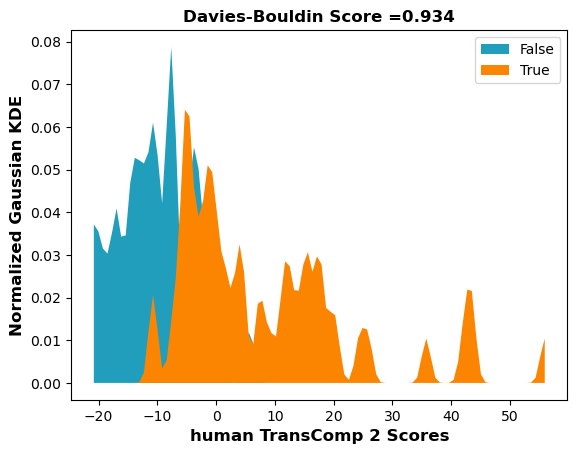

In [22]:
tcr.plot.partition(results,organism2_name='human', metric='db', pcs=[0,1])

Well, seems like they are messy and cannot separate 2 human classes well, which agree with our hypothesis that variance explained is not reflective of the dieases status.

If you want the save the graph, define the `save_path` in the inputs:

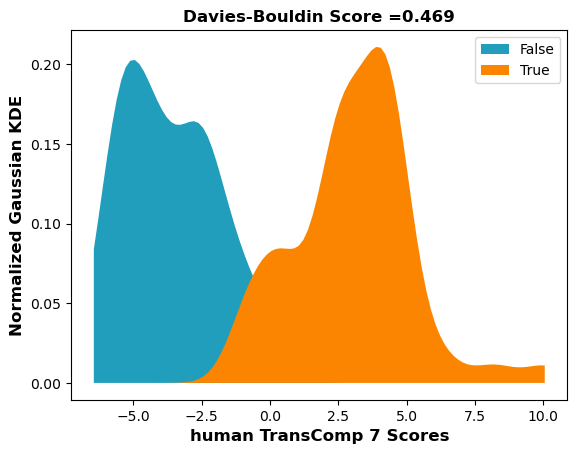

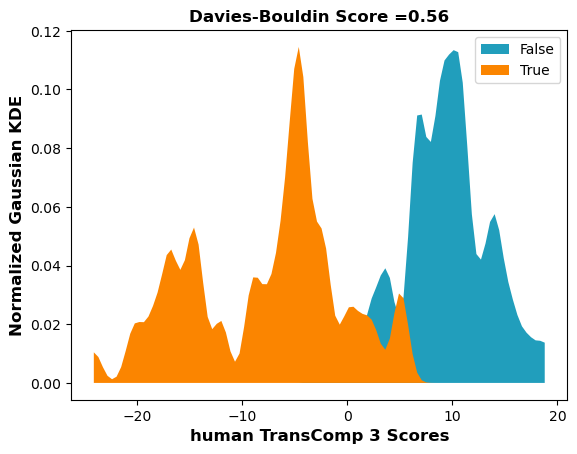

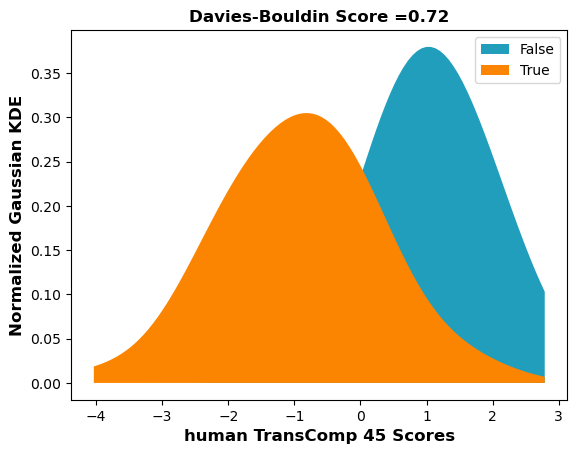

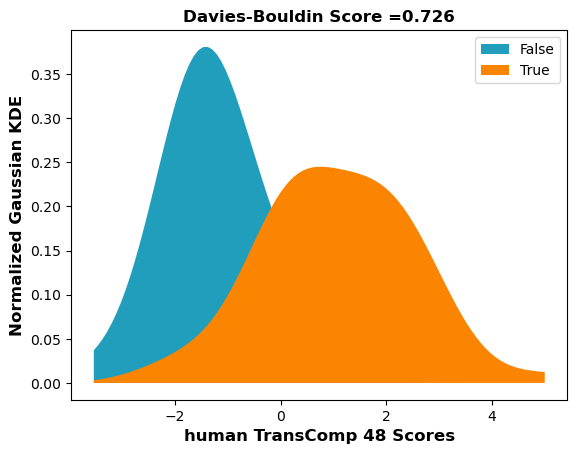

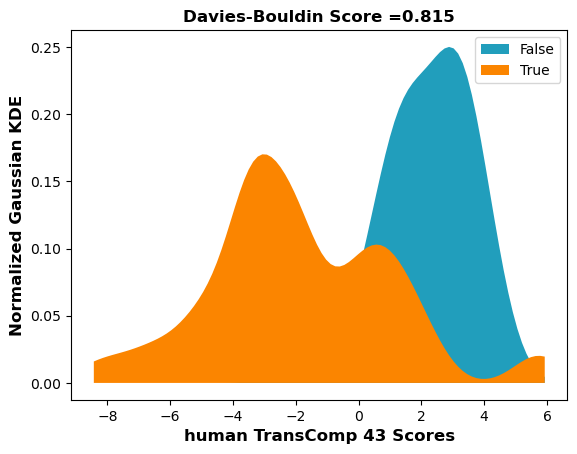

In [24]:
tcr.plot.partition(results,organism2_name='human', metric='db', top_n_pcs=5, save_path = '')

If you want all the matplotlib figures, set `return_figures` to `True`

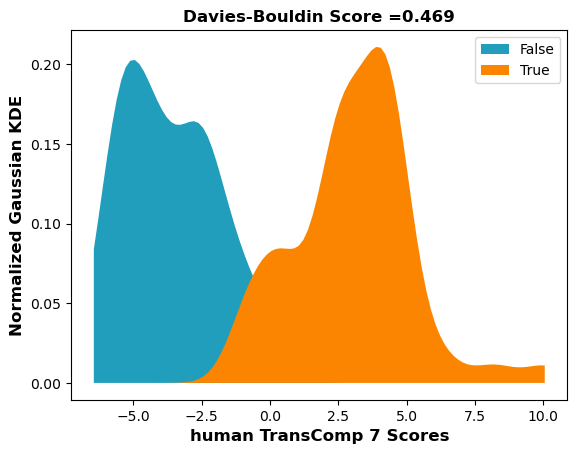

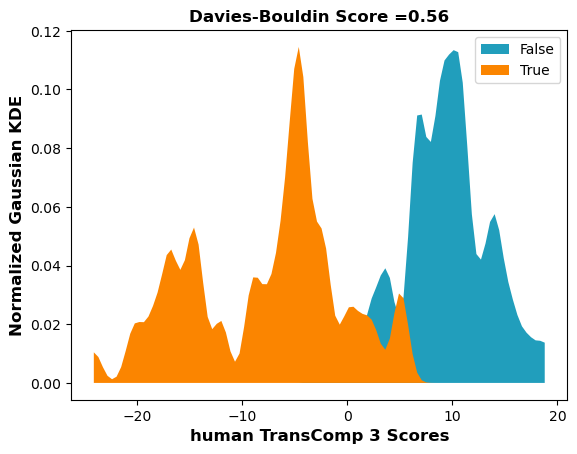

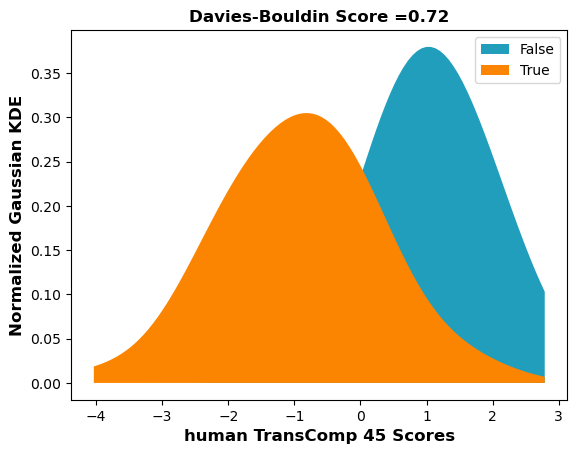

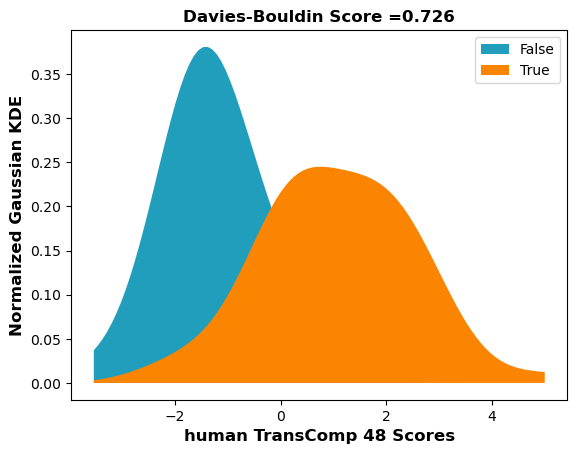

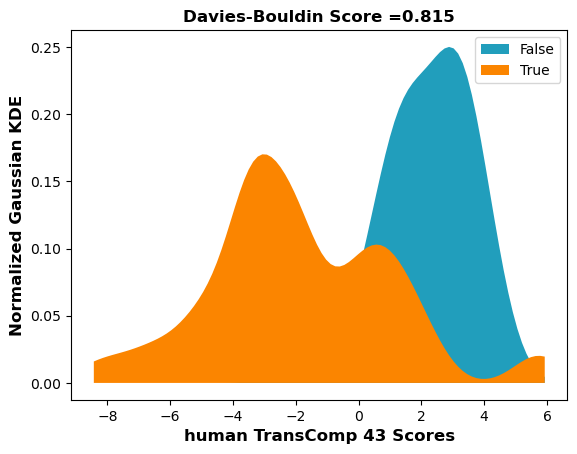

In [25]:
figures = tcr.plot.partition(results,organism2_name='human', metric='db', top_n_pcs=5, return_figures = True)

In [26]:
figures

[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

### Know what features are leading the predictive PCs

Again, if we are using the Davies Bouldin score as the metric for predictivity, PC 7, 3, 45, 48, and 43 are the top PCs that separate human classes well. In this way, we would like to look into features that have the largest loadings on those PCs. In other words, those features 'polarize' 2 classes on PCs.

In [27]:
sorted_df = results['predictivity_summary'].sort_values(by = 'davies_bouldin_score',ascending = True)

In [28]:
#This is the index
Interested_pcs_ID = sorted_df.head(5).index.tolist()
Interested_pcs_ID

[6, 2, 44, 47, 42]

In [29]:
#This is the 'name' of the PC
Interested_pcs = sorted_df.head(5)['PCs'].tolist()
Interested_pcs

['7', '3', '45', '48', '43']

In [30]:
for i in range(0,5):
    j = sorted_df.head(5)['sorted_organism1_features'].iloc[i]
    print('top_negative_loadings_features of PC '+ sorted_df.head(5)['PCs'].iloc[i], j[0:10])
    print('top_positive_loadings_features of PC '+ sorted_df.head(5)['PCs'].iloc[i], j[-10:])

top_negative_loadings_features of PC 7 ['Rpl28', 'Hs6st1', 'Pkig', 'Rps8', 'Rassf1', 'Tmem87a', 'Mpg', 'Srp14', 'Scg5', 'Galnt11']
top_positive_loadings_features of PC 7 ['Dnajc15', 'Cald1', 'Cbr1', 'Myom1', 'Pnpo', 'Cox6a1', 'Tulp4', 'Chmp1b', 'Pink1', 'Sord']
top_negative_loadings_features of PC 3 ['Mefv', 'Fcer1g', 'Tpd52', 'Alox5ap', 'P2ry13', 'Mboat7', 'Cdkn2d', 'Ffar2', 'Rhbdf2', 'Vasp']
top_positive_loadings_features of PC 3 ['Ivd', 'Nipsnap1', 'Gstk1', 'Dhcr7', 'Coq8a', 'Cyb5r3', 'Abhd6', 'Suox', 'Ephx1', 'Slc25a23']
top_negative_loadings_features of PC 45 ['Ldb2', 'Clec1a', 'Rbms2', 'Extl1', 'Arl2', 'Eogt', 'Col9a3', 'Pax1', 'Tfpt', 'Dct']
top_positive_loadings_features of PC 45 ['Lep', 'Hpse2', 'Itgb3bp', 'Urb1', 'Dntt', 'Mier2', 'Havcr1', 'Rag1', 'Pibf1', 'Ccr9']
top_negative_loadings_features of PC 48 ['Tmod2', 'Emx2', 'Btc', 'Dennd6b', 'Kcnj2', 'Mccc2', 'Snap25', 'B4galt3', 'Hpcal4', 'Cdhr2']
top_positive_loadings_features of PC 48 ['Nppc', 'Uqcrq', 'Tinf2', 'Tns4', 'Ptger

To visualize the loadings of features on a PC, you can either plot 1 or 2 PCs. Below is an example of ploting the feature loadings of PC3 and 7 separately then PC 3 and 7 together, with the top 20 features with the largest magnitude of loadings highlighted.

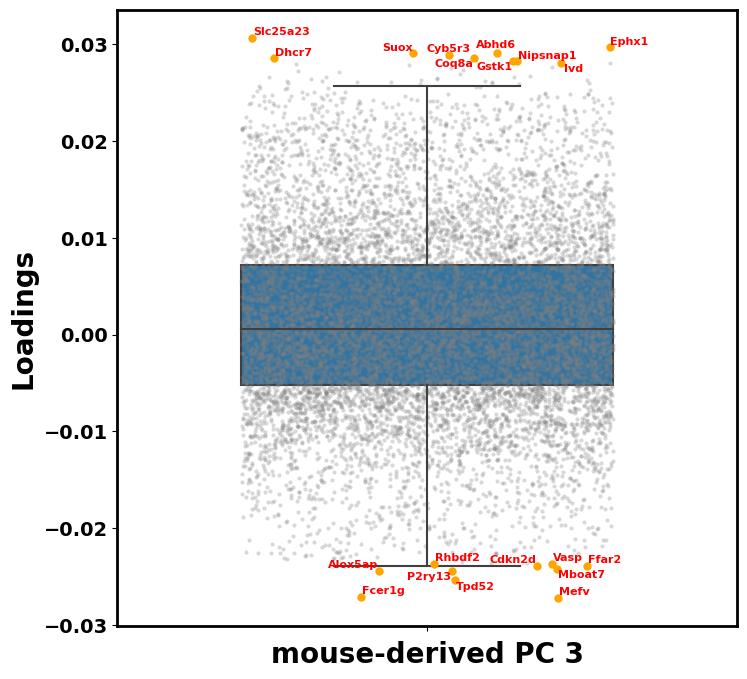

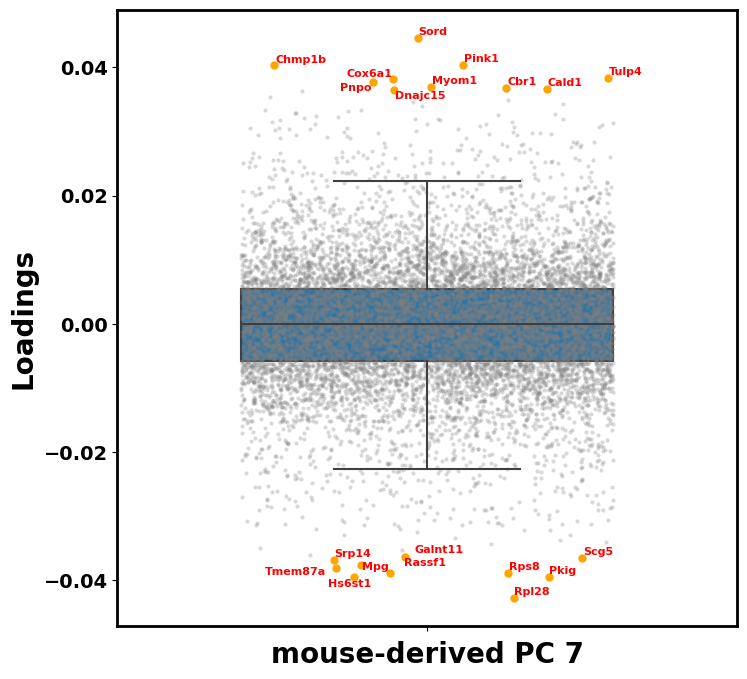

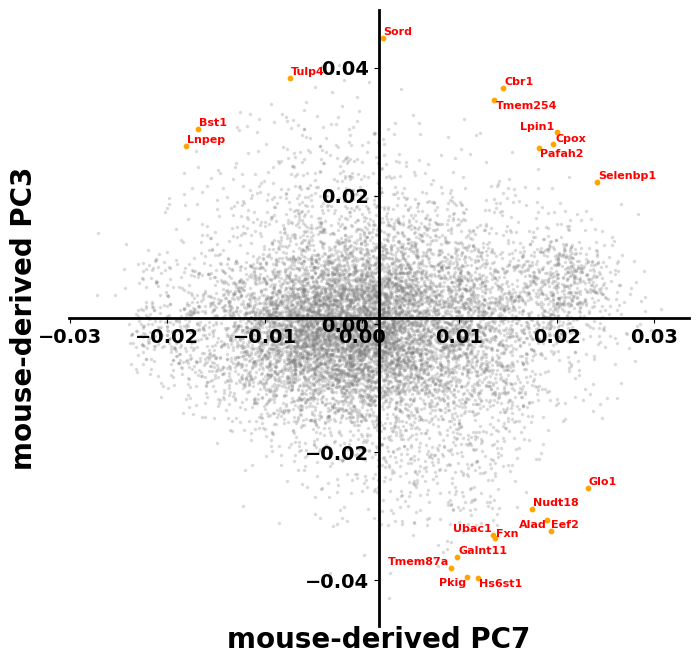

In [31]:
tcr.plot.loadings(results, [2,6,[2,6]], organism1_name='mouse', top_n_features=20)

Similarly, you can set the `save_path` and `return_figures` to save the graph or get the figure objects.

### Find out what pathways do the top features on both sides of the predictive PC encode

Currently, TransCompR supports Gene set enrichment analysis (GSEA) when the features in the dataset are gene expressions. 

Since essentially we are doing regression on the **human genes** aligned to the mouse PCs space, GSEA can be done on 1) the top mouse genes on mouse-derived PC and 2) the human homologs of those top mouse genes to reveal both mouse and human pathways that are predictive of human diseases status--both are useful. 

TransCompR using `gseapy` to perform the GSEA. By default, it selects the top 5 pcs that have the best separation on human classes based on Davies Bouldin score, chooses the top 100 positive-loading genes and top 100 negative-loading genes, runs GSEA on those groups of genes respectively while referring to human databases, and returns 2 lists of GSEA tables--upregulated and downregulated, respectively--to you. To summarize, after running the GSEA in its default, you should have 10 GSEA results, 1 upregulated and 1 downregulated for each of the top 5 pcs. See documentation for details.

First, let's try running the GSEA function to get a result. The result can also be saved to the path as a `.csv` file if you specify it.

In [32]:
GSEA_up_result, GSEA_down_result = tcr.tools.gsea(results,species='Human',save_path = '')

2023-08-20 17:54:18,274 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.05
2023-08-20 17:54:22,129 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.05


Let's take a look at one of the result table:

In [36]:
GSEA_up_result.keys()

dict_keys([6, 2, 44, 47, 42])

In [37]:
GSEA_up_result[6].head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,-log10_p_adj
Term,,,,,,,,,,,
negative regulation of mitochondrion organization (GO:0010823),GO_Biological_Process_2021,negative regulation of mitochondrion organizat...,4/34,0.000024,0.024144,0,0,27.597222,293.205098,PINK1;PPIF;MUL1;TMEM14A,1.617187
regulation of oxidative phosphorylation (GO:0002082),GO_Biological_Process_2021,regulation of oxidative phosphorylation (GO:00...,3/16,0.000065,0.032164,0,0,47.312450,456.304277,PINK1;PPIF;ATP7A,1.492628
organonitrogen compound biosynthetic process (GO:1901566),GO_Biological_Process_2021,organonitrogen compound biosynthetic process (...,6/158,0.000143,0.047079,0,0,8.292833,73.420201,ALDH3B2;ACHE;GSTO1;PCTP;LPIN1;MOCS1,1.327170
regulation of reactive oxygen species metabolic process (GO:2000377),GO_Biological_Process_2021,regulation of reactive oxygen species metaboli...,4/57,0.000190,0.047079,0,0,15.602987,133.723184,CBR1;BST1;PINK1;GADD45A,1.327170
regulation of sodium:proton antiporter activity (GO:0032415),GO_Biological_Process_2021,regulation of sodium:proton antiporter activit...,2/5,0.000245,0.048674,0,0,135.353741,1125.317013,TESC;CHP1,1.312700


TransCompR can visualize it with bar plots. By default, for each GSEA result (1 PC, 1 direction), it will visualize the top 10 pathways that has the lowest adjusted p-value. If you want to visualize more terms, simply set the argument `n_go` to some integer you like.

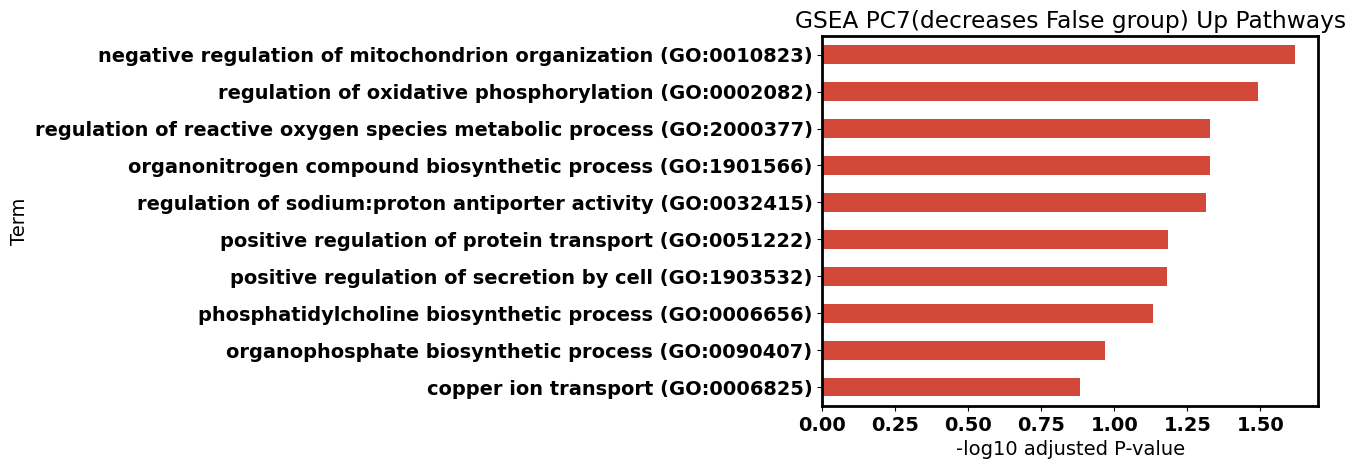

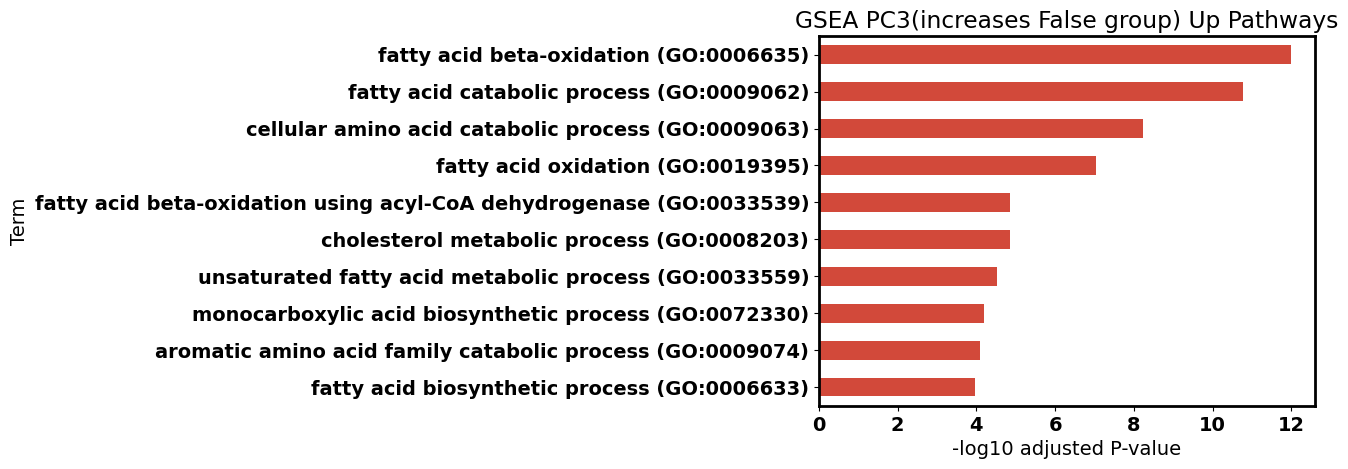

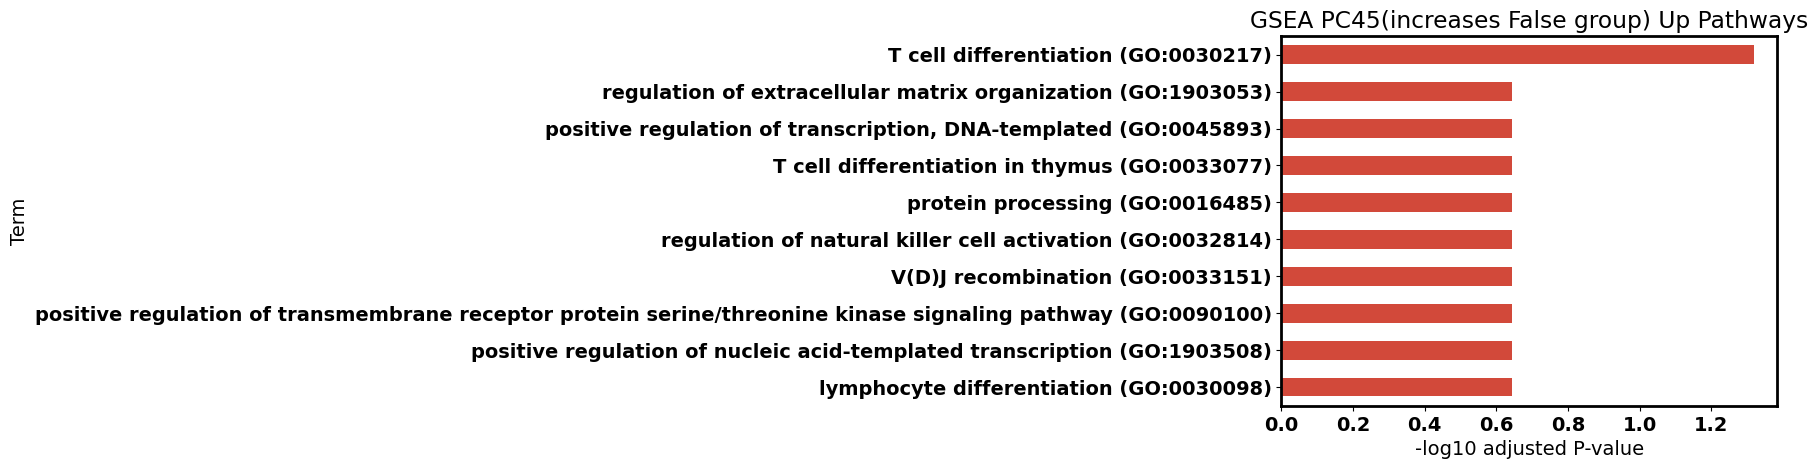

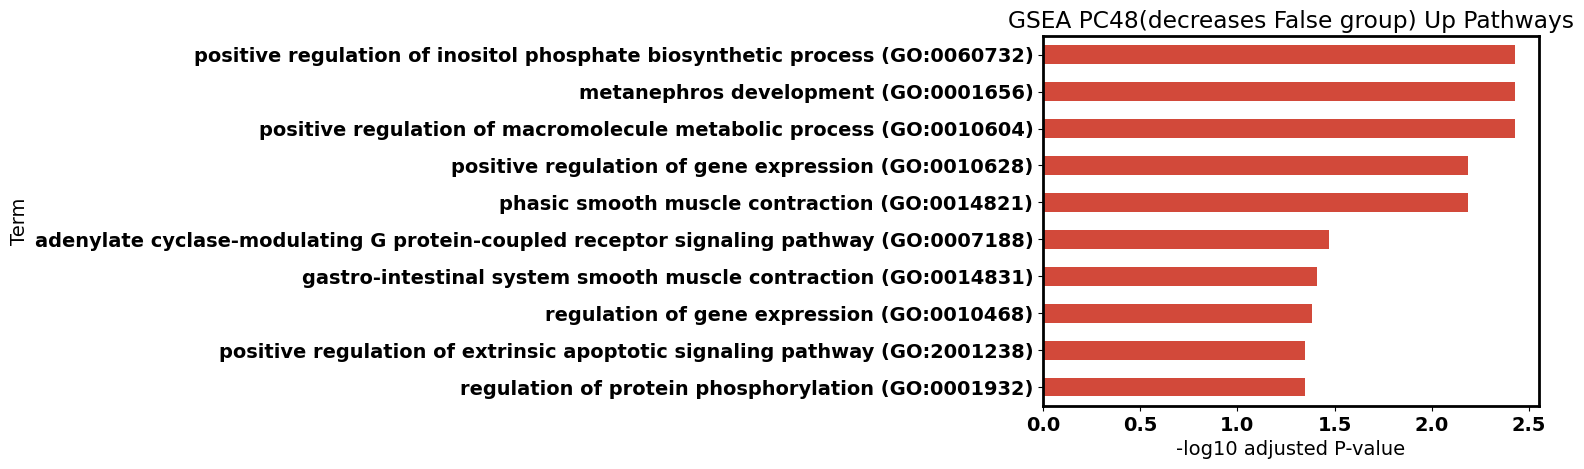

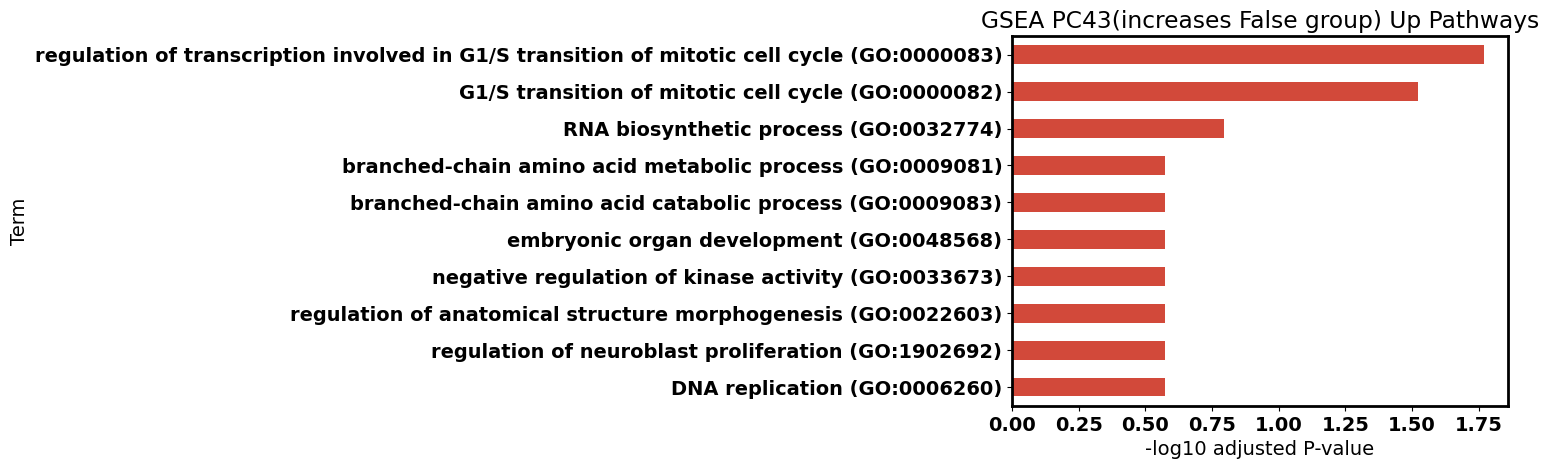

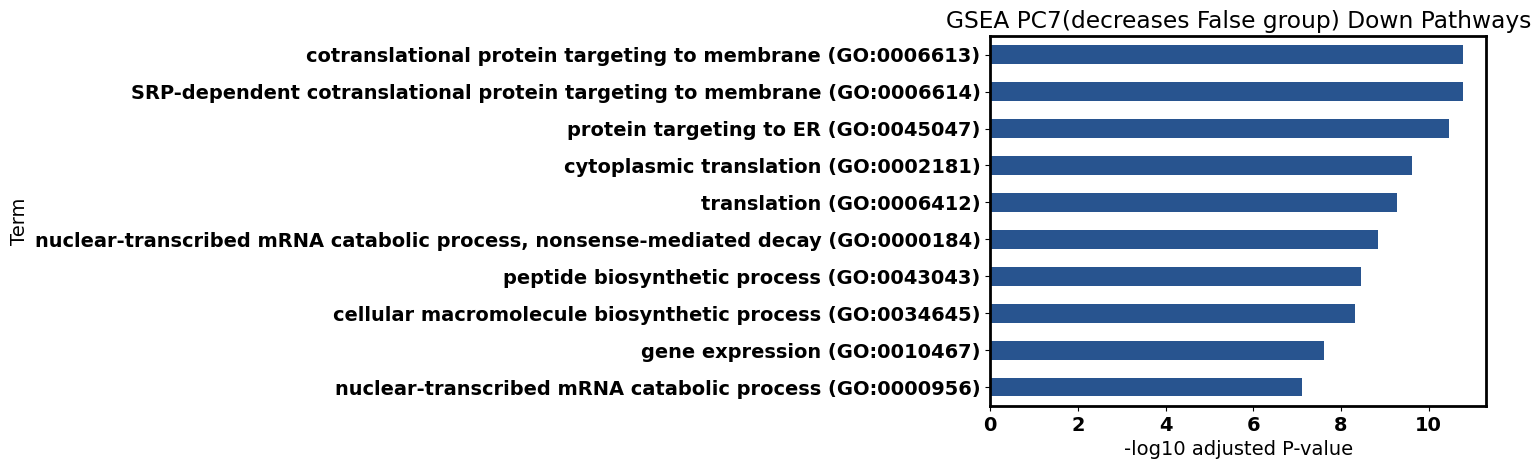

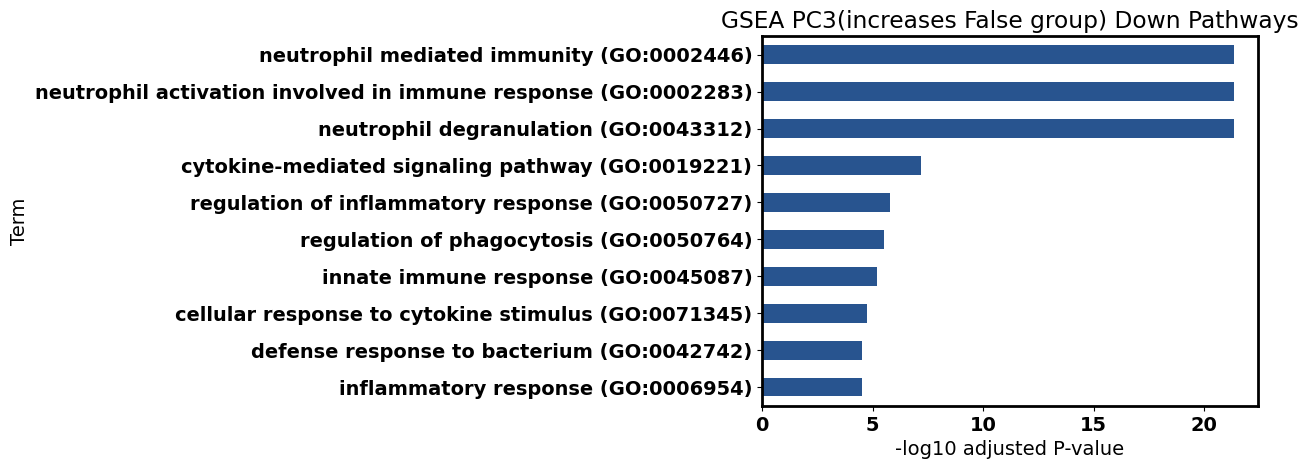

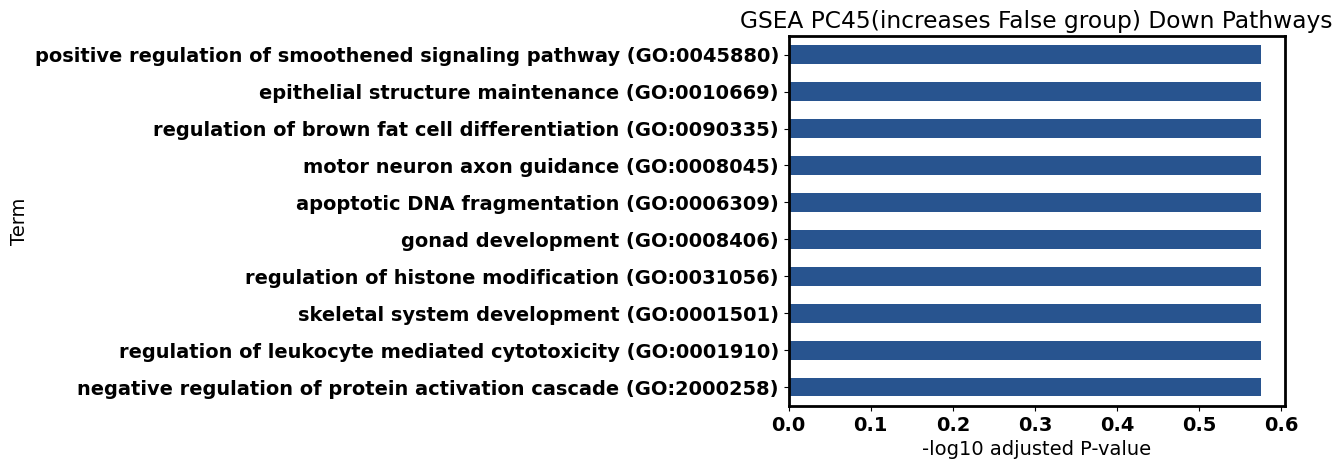

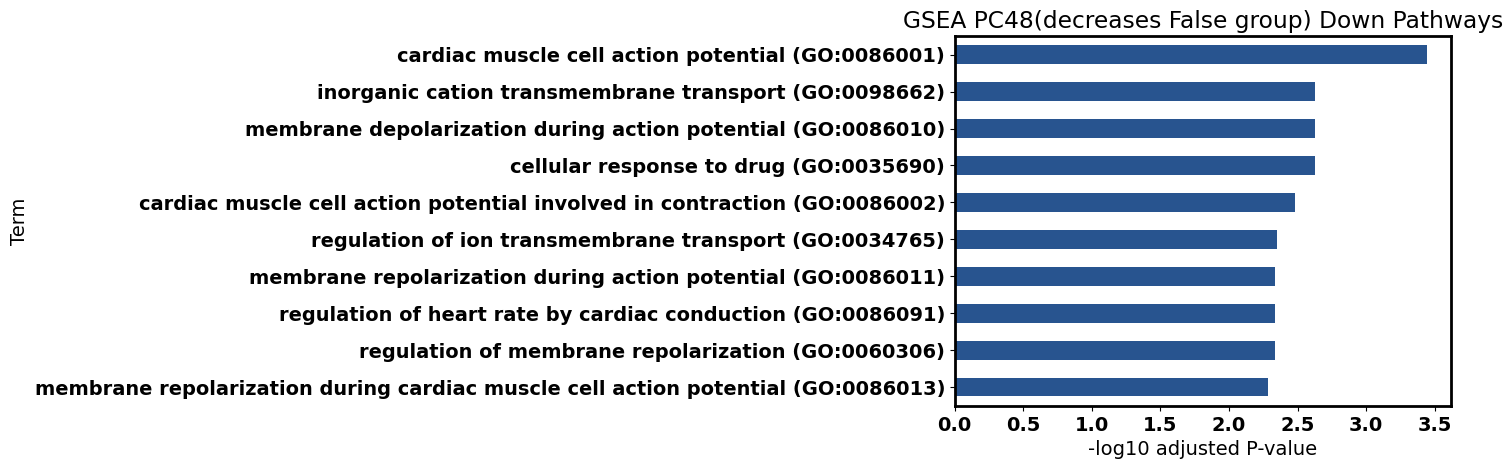

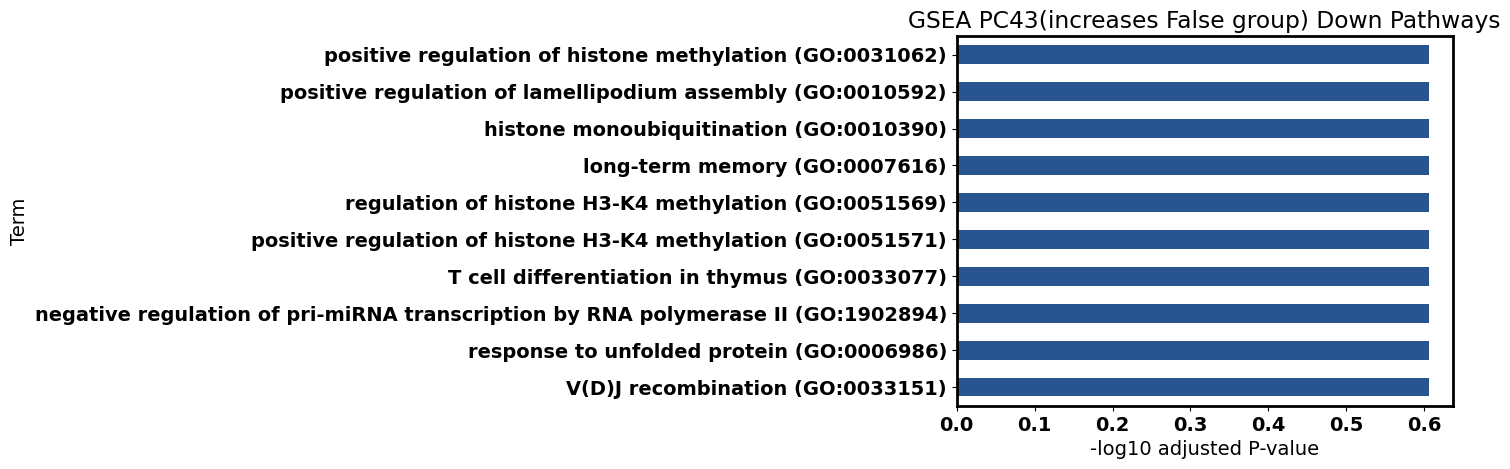

In [35]:
tcr.plot.gsea_bar(results, GSEA_up_result, GSEA_down_result, n_go=10, facecolor=['#D2493A','#28548f'])

### Conclusion

That's the end of the basic tutorial!

If you want to take organism2 covariates into consideration, please check another tutorial on our github.